In [1]:
# importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [2]:
# Load the dataset
dataset = pd.read_csv('hate.csv', encoding='latin-1')
dataset.shape

(41144, 3)

Data Preprocessing

In [3]:
dataset.head()

,Unnamed: 0,comment,label
0,1,dalits are lowlives,N
1,2,gay people are a burden to our society,N
2,3,Arabs are not welcome,N
3,4,I'm not saying we should actually eliminate he...,N
4,5,bananas are for black people,N


In [4]:
dataset.tail()

,Unnamed: 0,comment,label
41139,117100,Indian culture is so backwards,N
41140,118100,"Women don't want equality, they just want to b...",N
41141,119100,fuck covid,P
41142,1205,This computer is garbage,P
41143,121100,The only good Muslim is a dead one,N


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  41144 non-null  int64 
 1   comment     41144 non-null  object
 2   label       41144 non-null  object
dtypes: int64(1), object(2)
memory usage: 964.4+ KB


Exploratory Data Analysis

In [6]:
# check statistical measures
dataset.describe(include = 'all')

,Unnamed: 0,comment,label
count,41144.000000,41144,41144
unique,NaN,41134,3
top,NaN,Blacks are such pondlife,N
freq,NaN,5,22158
mean,20703.991056,NaN,NaN
std,12580.884040,NaN,NaN
min,1.000000,NaN,NaN
25%,10295.750000,NaN,NaN
50%,20593.500000,NaN,NaN
75%,30894.250000,NaN,NaN


In [7]:
# check for null values
dataset.isnull().sum()

Unnamed: 0    0
comment       0
label         0
dtype: int64

In [8]:
# check unique values
dataset.nunique()

Unnamed: 0    41144
comment       41134
label             3
dtype: int64

In [9]:
dataset.nunique()['label']

3

In [10]:
dataset.value_counts('label')

label
N    22158
P    18950
O       36
dtype: int64

<Axes: xlabel='label'>

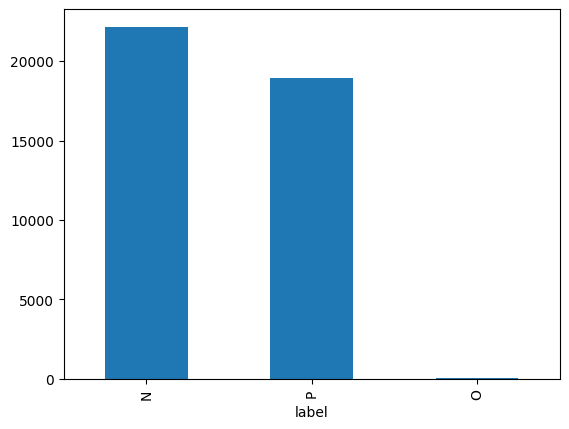

In [11]:
dataset.value_counts('label').plot(kind='bar')

In [12]:
dataset.value_counts('comment')

comment
Blacks are such pondlife                                                                                                                                                                                   5
Muslims are a disgrace                                                                                                                                                                                     3
Politicians are crap                                                                                                                                                                                       2
Politicians are scum                                                                                                                                                                                       2
I endorse the genocide of Muslims                                                                                                                                           

In [13]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the dataset
dataset['preprocessed_text'] = dataset['comment'].apply(preprocess_text)

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['preprocessed_text'], dataset['label'], test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32915,)
(8229,)
(32915,)
(8229,)


In [17]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
# Convert text data to input format for BERT
inputs_train = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors="pt")
inputs_test = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="pt")

In [19]:
inputs_train

{'input_ids': tensor([[  101,  2132,  6616,  ...,     0,     0,     0],
        [  101, 10047,  2175,  ...,     0,     0,     0],
        [  101,  6752,  2072,  ...,     0,     0,     0],
        ...,
        [  101,  5413,  2229,  ...,     0,     0,     0],
        [  101, 25386,  4995,  ...,     0,     0,     0],
        [  101,  2115,  9643,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [20]:
inputs_test

{'input_ids': tensor([[  101,  2591, 14262,  ...,     0,     0,     0],
        [  101,  6300,  8257,  ...,     0,     0,     0],
        [  101,  6896,  2166,  ...,     0,     0,     0],
        ...,
        [  101,  8823,  6616,  ...,     0,     0,     0],
        [  101,  2308,  4424,  ...,     0,     0,     0],
        [  101, 24970,  3191,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [21]:
# # Tokenize input texts
# tokenized_texts = [tokenizer.encode(text, max_length=512, truncation=True) for text in X_train]

# # Pad tokenized sequences
# max_len = max([len(text) for text in tokenized_texts])
# padded_texts = [text + [0]*(max_len-len(text)) for text in tokenized_texts]

# # Convert to tensors
# input_ids = torch.tensor(padded_texts)
# labels = torch.tensor(y_train_numerical)

# # Prepare optimizer and loss function
# optimizer = AdamW(model.parameters(), lr=5e-5)

# # Train the model
# model.train()
# optimizer.zero_grad()
# outputs = model(input_ids, labels=labels)
# loss = outputs.loss
# loss.backward()
# optimizer.step()

# # Evaluate the model
# model.eval()
# tokenized_texts_test = [tokenizer.encode(text, max_length=512, truncation=True) for text in X_test]
# padded_texts_test = [text + [0]*(max_len-len(text)) for text in tokenized_texts_test]
# input_ids_test = torch.tensor(padded_texts_test)
# labels_test = torch.tensor(y_test)

# with torch.no_grad():
#     outputs_test = model(input_ids_test)
#     predictions = torch.argmax(outputs_test.logits, dim=1)
#     accuracy = torch.sum(predictions == labels_test).item() / len(predictions)

# print("Accuracy:", accuracy)

In [22]:
# from sklearn.preprocessing import LabelEncoder
# import torch
# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit label encoder and transform labels
# y_train_numerical = label_encoder.fit_transform(y_train)

# # Convert to tensor
# labels = torch.tensor(y_train_numerical)

In [23]:
# Model selection and training
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Define the model pipeline
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(kernel='linear'))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6692186170859157
Classification Report:
               precision    recall  f1-score   support

           N       0.68      0.71      0.69      4375
           O       0.00      0.00      0.00         4
           P       0.65      0.63      0.64      3850

    accuracy                           0.67      8229
   macro avg       0.45      0.44      0.44      8229
weighted avg       0.67      0.67      0.67      8229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# y_pred contains the predicted labels and y_test contains the true labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6692186170859157
Precision: 0.6683366966789801
Recall: 0.6692186170859157
F1-score: 0.6685305167246044


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Define the model pipeline with Random Forest classifier
model_pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

# Train the model
model_pipeline_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_pipeline_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6692186170859157
Classification Report:
               precision    recall  f1-score   support

           N       0.68      0.71      0.69      4375
           O       0.00      0.00      0.00         4
           P       0.65      0.63      0.64      3850

    accuracy                           0.67      8229
   macro avg       0.45      0.44      0.44      8229
weighted avg       0.67      0.67      0.67      8229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the model pipeline with Logistic Regression
model_pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

# Train the model
model_pipeline_lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = model_pipeline_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_score_lr = f1_score(y_test, y_pred_lr, average='weighted')
classification_report_lr = classification_report(y_test, y_pred_lr)

# Print evaluation metrics
print("Evaluation Metrics for Logistic Regression Model:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_score_lr)
print("\nClassification Report:")
print(classification_report_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation Metrics for Logistic Regression Model:
Accuracy: 0.6671527524608093
Precision: 0.6661744120106227
Recall: 0.6671527524608093
F1 Score: 0.666210939861696

Classification Report:
              precision    recall  f1-score   support

           N       0.68      0.71      0.69      4375
           O       0.00      0.00      0.00         4
           P       0.65      0.62      0.63      3850

    accuracy                           0.67      8229
   macro avg       0.44      0.44      0.44      8229
weighted avg       0.67      0.67      0.67      8229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from joblib import dump

dump(model_pipeline_lr, 'model.pkl')

['model.pkl']

In [28]:
from google.colab import files

files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>